<a href="https://colab.research.google.com/github/PhonxayMax/Math-and-Architectures-of-Deep-Learning/blob/main/CH7_7_4_3_approximating_surfaces_with_perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#Checked 14/04/2025
from google.colab import drive
drive.mount('/content/Math_For_DL_Chaudhury')

Drive already mounted at /content/Math_For_DL_Chaudhury; to attempt to forcibly remount, call drive.mount("/content/Math_For_DL_Chaudhury", force_remount=True).


In [18]:
%run Math_For_DL_Chaudhury/MyDrive/1_Math_For_DL_Chaudhury/CH7_7_2_3_perceptron.ipynb

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter, LinearLocator

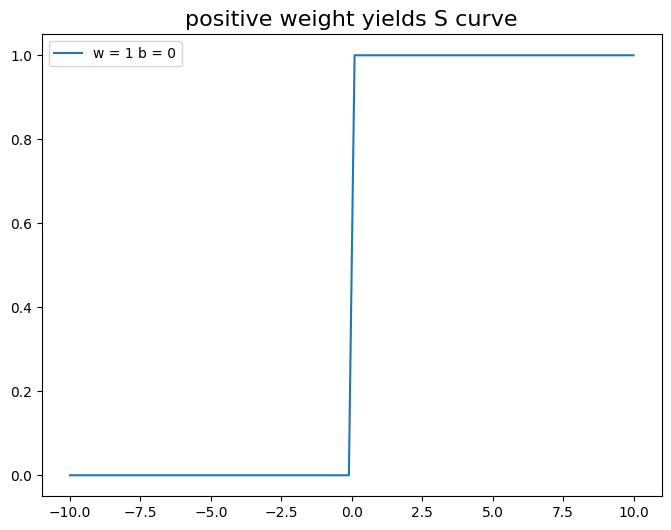

In [20]:
mpl.rcParams['legend.fontsize'] = 10
# 1D S curves - positive weight
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
x = torch.linspace(start=-10, end=10, steps=100)
w = torch.tensor([1.0], dtype=torch.float32)
b = torch.tensor([0.0])
y = Perceptron(X=x.unsqueeze(dim=1), W=w.unsqueeze(dim=1), b=b, activation=torch.heaviside)
ax.plot(x.squeeze(), y.squeeze(), label="w = 1 b = 0")
plt.title("positive weight yields S curve", fontsize=16)
ax.legend()
plt.show()
fig.show()

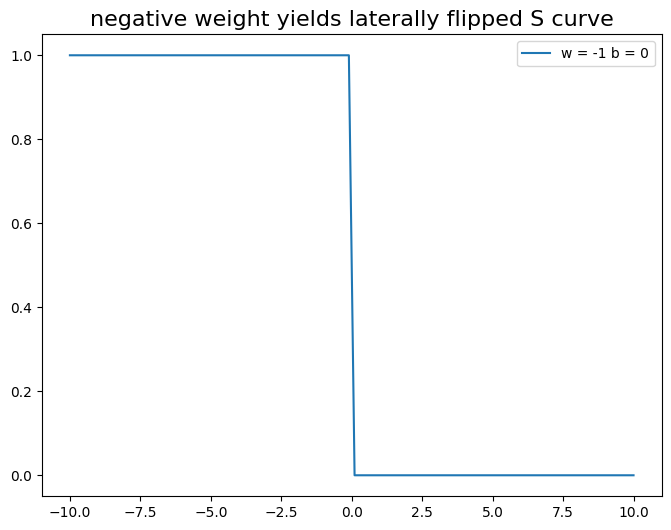

In [21]:
# 1D S curves - negative weight
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
x = torch.linspace(start=-10, end=10, steps=100)
w = torch.tensor([-1.0], dtype=torch.float32)
b = torch.tensor([0.0])
y = Perceptron(X=x.unsqueeze(dim=1), W=w.unsqueeze(dim=1), b=b, activation=torch.heaviside)
ax.plot(x.squeeze(), y.squeeze(), label="w = -1 b = 0")
plt.title("negative weight yields laterally flipped S curve", fontsize=16)
ax.legend()
plt.show()
fig.show()

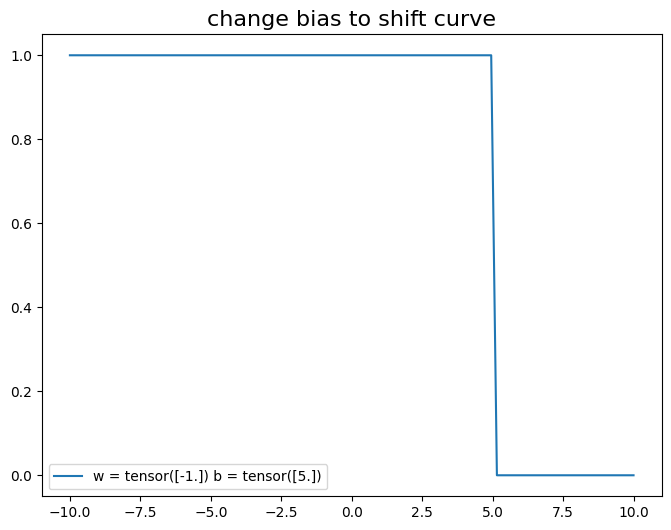

In [22]:
# 1D S curves - negative weight + shift
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
x = torch.linspace(start=-10, end=10, steps=100)
w = torch.tensor([-1.0], dtype=torch.float32)
b = torch.tensor([5.0])
y = Perceptron(X=x.unsqueeze(dim=1), W=w.unsqueeze(dim=1), b=b, activation=torch.heaviside)
ax.plot(x.squeeze(), y.squeeze(), label="w = {} b = {}".format(w, b))
plt.title("change bias to shift curve", fontsize=16)
ax.legend()
plt.show()
fig.show()

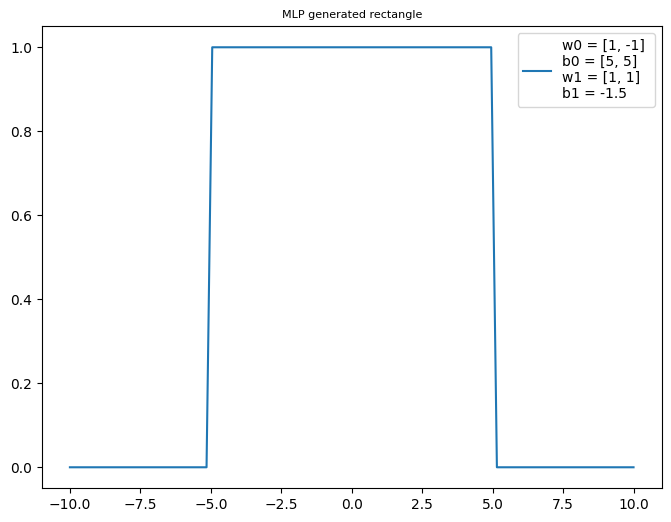

In [23]:
# 1D towers (cybenko) - various W0
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
x = torch.linspace(start=-10, end=10, steps=100)
W0 = torch.tensor([[1.0],
                   [-1.0]], dtype=torch.float32)
b0 = torch.tensor([5.0, 5.0])
W1 = torch.tensor([[1.0, 1.0]], dtype=torch.float32)
b1 = torch.tensor([-1.5])
y = MLP(X=x.unsqueeze(dim=1), W0=W0, W1=W1, b0=b0, b1=b1, activation0=torch.heaviside,activation1=torch.heaviside)
ax.plot(x.squeeze(), y.squeeze(),
        label="w0 = [1, -1] \nb0 = [5, 5] \nw1 = [1, 1] \nb1 = -1.5")
plt.title("MLP generated rectangle", fontsize=8)
ax.legend()
plt.show()
fig.show()

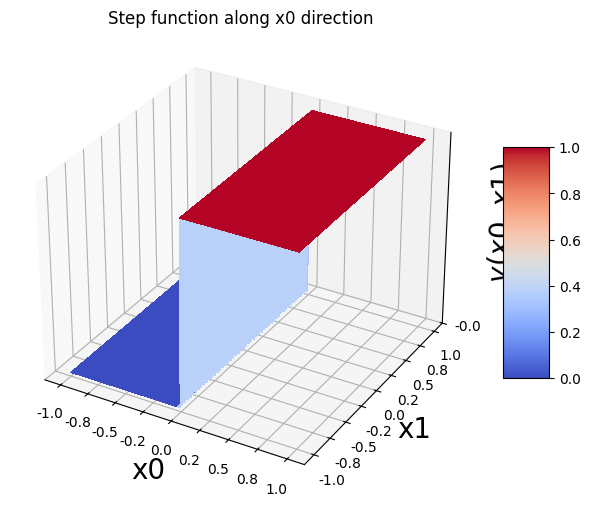

In [24]:
# 2D Step function in X-direction
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Import the necessary module for 3D plotting
import torch
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter, LinearLocator

X = torch.linspace(start=-1, end=1, steps=100)
Y = torch.linspace(start=-1, end=1, steps=100)
gridX, gridY = torch.meshgrid(X, Y)
W = torch.tensor([[1.0, 0.0]], dtype=torch.float32)
b = torch.tensor([0.0], dtype=torch.float32)
X = torch.tensor([(y, x) for y, x in zip(gridX.reshape(-1), gridY.reshape(-1))])
Z = Perceptron(X=X, W=W, b=b, activation=torch.heaviside)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d') # Use add_subplot with projection='3d'
surf = ax.plot_surface(
    gridX, gridY, Z.reshape(100, -1).numpy(), cmap=cm.coolwarm,
    linewidth=0, antialiased=False
)
ax.xaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_locator(LinearLocator(1))
ax.set_zlabel("$y(x0, x1)$", fontsize=20, rotation=0)
ax.set_xlabel("x0", fontsize=20)
ax.set_ylabel("x1", fontsize=20)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Step function along x0 direction')
plt.show()
fig.show()

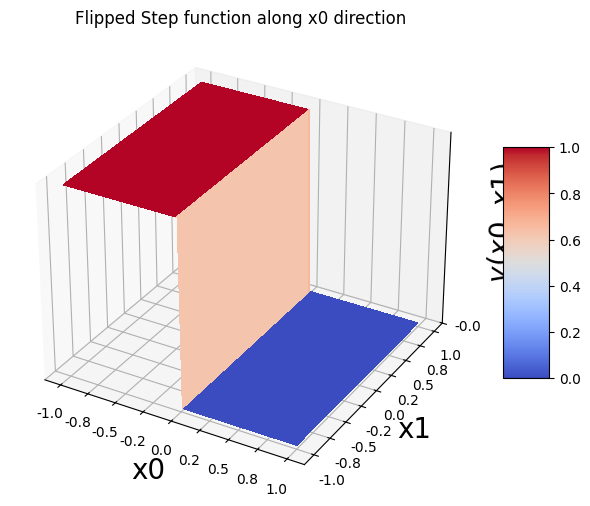

In [25]:
# 2D Flipped Step function along X-direction
W = torch.tensor([[-1.0, 0.0]], dtype=torch.float32)
b = torch.tensor([0.0], dtype=torch.float32)
X = torch.tensor([(y, x) for y, x in zip(gridX.reshape(-1), gridY.reshape(-1))])
Z = Perceptron(X=X, W=W, b=b, activation=torch.heaviside)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  # Creates a 3D subplot within the figure
surf = ax.plot_surface(
    gridX, gridY, Z.reshape(100, -1).numpy(), cmap=cm.coolwarm,
    linewidth=0, antialiased=False
)
ax.xaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_locator(LinearLocator(1))
ax.set_zlabel("$y(x0, x1)$", fontsize=20, rotation=0)
ax.set_xlabel("x0", fontsize=20)
ax.set_ylabel("x1", fontsize=20)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Flipped Step function along x0 direction')
plt.show()
fig.show()

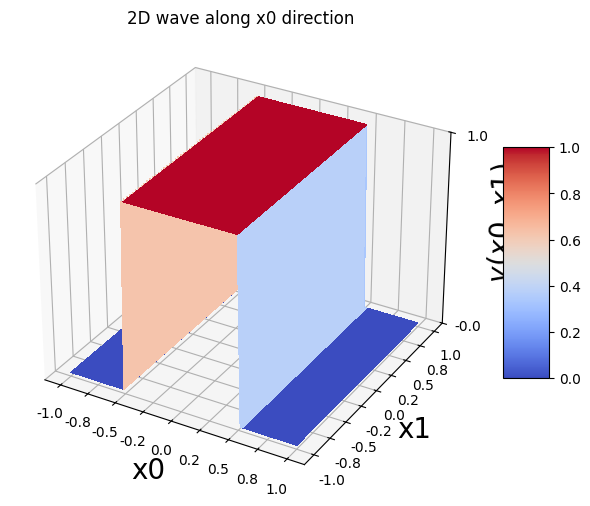

In [26]:
# 2D wave along x-direction
X = torch.linspace(start=-1, end=1, steps=100)
Y = torch.linspace(start=-1, end=1, steps=100)
gridX, gridY = torch.meshgrid(X, Y)
X = torch.tensor([(y, x) for y, x in zip(gridX.reshape(-1), gridY.reshape(-1))])
W0 = torch.tensor([[1.0, 0.0],
                    [-1.0, 0.0]
                    ], dtype=torch.float32)
b0 = torch.tensor([0.5, 0.5], dtype=torch.float32)
W1 = torch.tensor([[1.0, 1.0]], dtype=torch.float32)
b1 = torch.tensor([-1.5])
Z = MLP(X=X, W0=W0, W1=W1, b0=b0, b1=b1, activation0=torch.heaviside, activation1=torch.heaviside)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  # Creates a 3D subplot within the figure
surf = ax.plot_surface(
    gridX, gridY, Z.reshape(100, -1).numpy(), cmap=cm.coolwarm,
    linewidth=0, antialiased=False
)
ax.xaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_locator(LinearLocator(2))
ax.set_zlabel("$y(x0, x1)$", fontsize=20, rotation=0)
ax.set_xlabel("x0", fontsize=20)
ax.set_ylabel("x1", fontsize=20)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('2D wave along x0 direction')
plt.show()
fig.show()

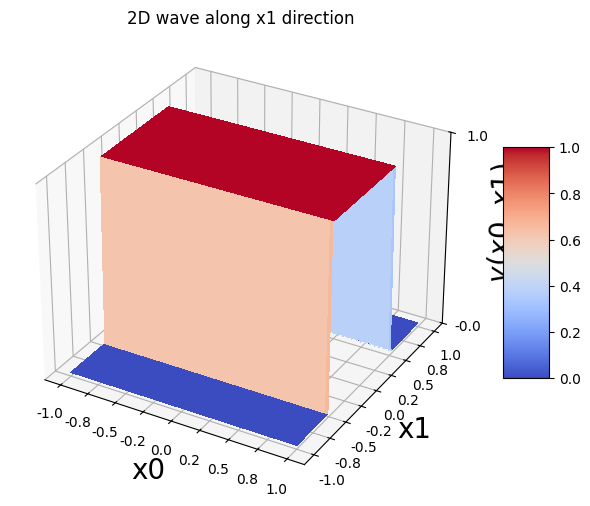

In [27]:
# 2D wave along y-direction
X = torch.linspace(start=-1, end=1, steps=100)
Y = torch.linspace(start=-1, end=1, steps=100)
gridX, gridY = torch.meshgrid(X, Y)
X = torch.tensor([(y, x) for y, x in zip(gridX.reshape(-1), gridY.reshape(-1))])
W0 = torch.tensor([[0.0, 1.0],
                    [0.0, -1.0]
                    ], dtype=torch.float32)
b0 = torch.tensor([0.5, 0.5], dtype=torch.float32)
W1 = torch.tensor([[1.0, 1.0]], dtype=torch.float32)
b1 = torch.tensor([-1.5])
Z = MLP(X=X, W0=W0, W1=W1, b0=b0, b1=b1, activation0=torch.heaviside, activation1=torch.heaviside)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  # Creates a 3D subplot within the figure
surf = ax.plot_surface(
    gridX, gridY, Z.reshape(100, -1).numpy(), cmap=cm.coolwarm,
    linewidth=0, antialiased=False
)
ax.xaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_locator(LinearLocator(2))
ax.set_zlabel("$y(x0, x1)$", fontsize=20, rotation=0)
ax.set_xlabel("x0", fontsize=20)
ax.set_ylabel("x1", fontsize=20)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('2D wave along x1 direction')
plt.show()
fig.show()

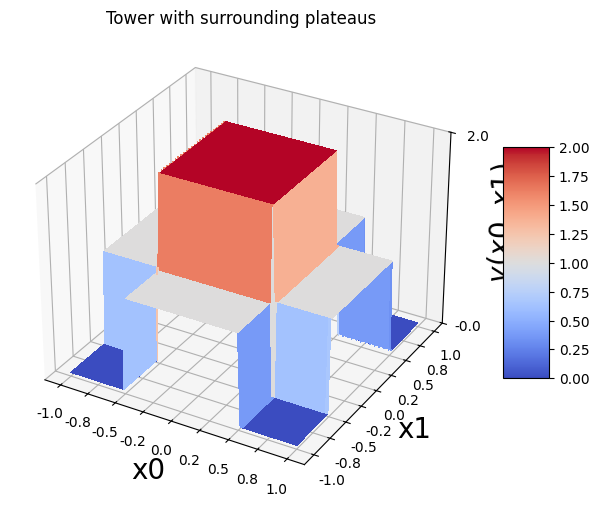

In [28]:
X = torch.linspace(start=-1, end=1, steps=100)
Y = torch.linspace(start=-1, end=1, steps=100)
gridX, gridY = torch.meshgrid(X, Y)
X = torch.tensor([(y, x) for y, x in zip(gridX.reshape(-1), gridY.reshape(-1))])
W0 = torch.tensor([[1.0, 0.0],
                    [-1.0, 0.0],
                    [0.0, 1.0],
                    [0.0, -1.0]
                    ], dtype=torch.float32)
b0 = torch.tensor([0.5, 0.5, 0.5, 0.5], dtype=torch.float32)
W1 = torch.tensor([[1.0, 1.0, 1.0, 1.0]], dtype=torch.float32)
b1 = torch.tensor([-2.0])
Z = MLP(X=X, W0=W0, W1=W1, b0=b0, b1=b1, activation0=torch.heaviside)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  # Creates a 3D subplot within the figure
surf = ax.plot_surface(
    gridX, gridY, Z.reshape(100, -1).numpy(), cmap=cm.coolwarm,
    linewidth=0, antialiased=False
)
ax.xaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_locator(LinearLocator(2))
ax.set_zlabel("$y(x0, x1)$", fontsize=20, rotation=0)
ax.set_xlabel("x0", fontsize=20)
ax.set_ylabel("x1", fontsize=20)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Tower with surrounding plateaus')
plt.show()
fig.show()

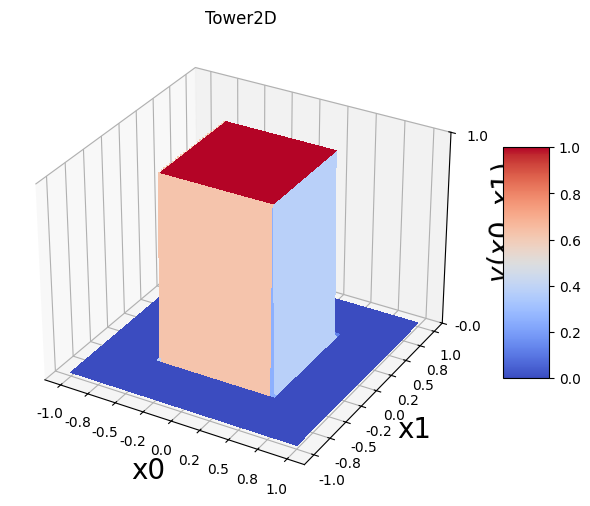

In [29]:
# 2D Tower
X = torch.linspace(start=-1, end=1, steps=100)
Y = torch.linspace(start=-1, end=1, steps=100)
gridX, gridY = torch.meshgrid(X, Y)
X = torch.tensor([(y, x) for y, x in zip(gridX.reshape(-1), gridY.reshape(-1))])
W0 = torch.tensor([[1.0, 0.0],
                    [-1.0, 0.0],
                    [0.0, 1.0],
                    [0.0, -1.0]
                    ], dtype=torch.float32)
b0 = torch.tensor([0.5, 0.5, 0.5, 0.5], dtype=torch.float32)
W1 = torch.tensor([[1.0, 1.0, 1.0, 1.0]], dtype=torch.float32)
b1 = torch.tensor([-3.5])
Z = MLP(X=X, W0=W0, W1=W1, b0=b0, b1=b1, activation0=torch.heaviside, activation1=torch.heaviside)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  # Creates a 3D subplot within the figure
surf = ax.plot_surface(
    gridX, gridY, Z.reshape(100, -1).numpy(), cmap=cm.coolwarm,
    linewidth=0, antialiased=False
)
ax.xaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_locator(LinearLocator(2))
ax.set_zlabel("$y(x0, x1)$", fontsize=20, rotation=0)
ax.set_xlabel("x0", fontsize=20)
ax.set_ylabel("x1", fontsize=20)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Tower2D')
plt.show()
fig.show()